In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python/refs/heads/main/data/movies_train.csv'
df = pd.read_csv(url)
col_discription = ['제목','배급사','장르','개봉일','상영시간','상영등급','감독이름','감독 이전작품 평균 관객수', '감독 이전 작품수', '스탭수', '주연배우수', '관객수']
df.columns
pd.DataFrame(col_discription,index=df.columns)


,0
title,제목
distributor,배급사
genre,장르
release_time,개봉일
time,상영시간
screening_rat,상영등급
director,감독이름
dir_prev_bfnum,감독 이전작품 평균 관객수
dir_prev_num,감독 이전 작품수
num_staff,스탭수


In [2]:
df.head(2)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501


In [3]:
#결측치 찾기
df.info()   # 7   dir_prev_bfnum  270 non-null    float64
df.dir_prev_bfnum.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


np.int64(330)

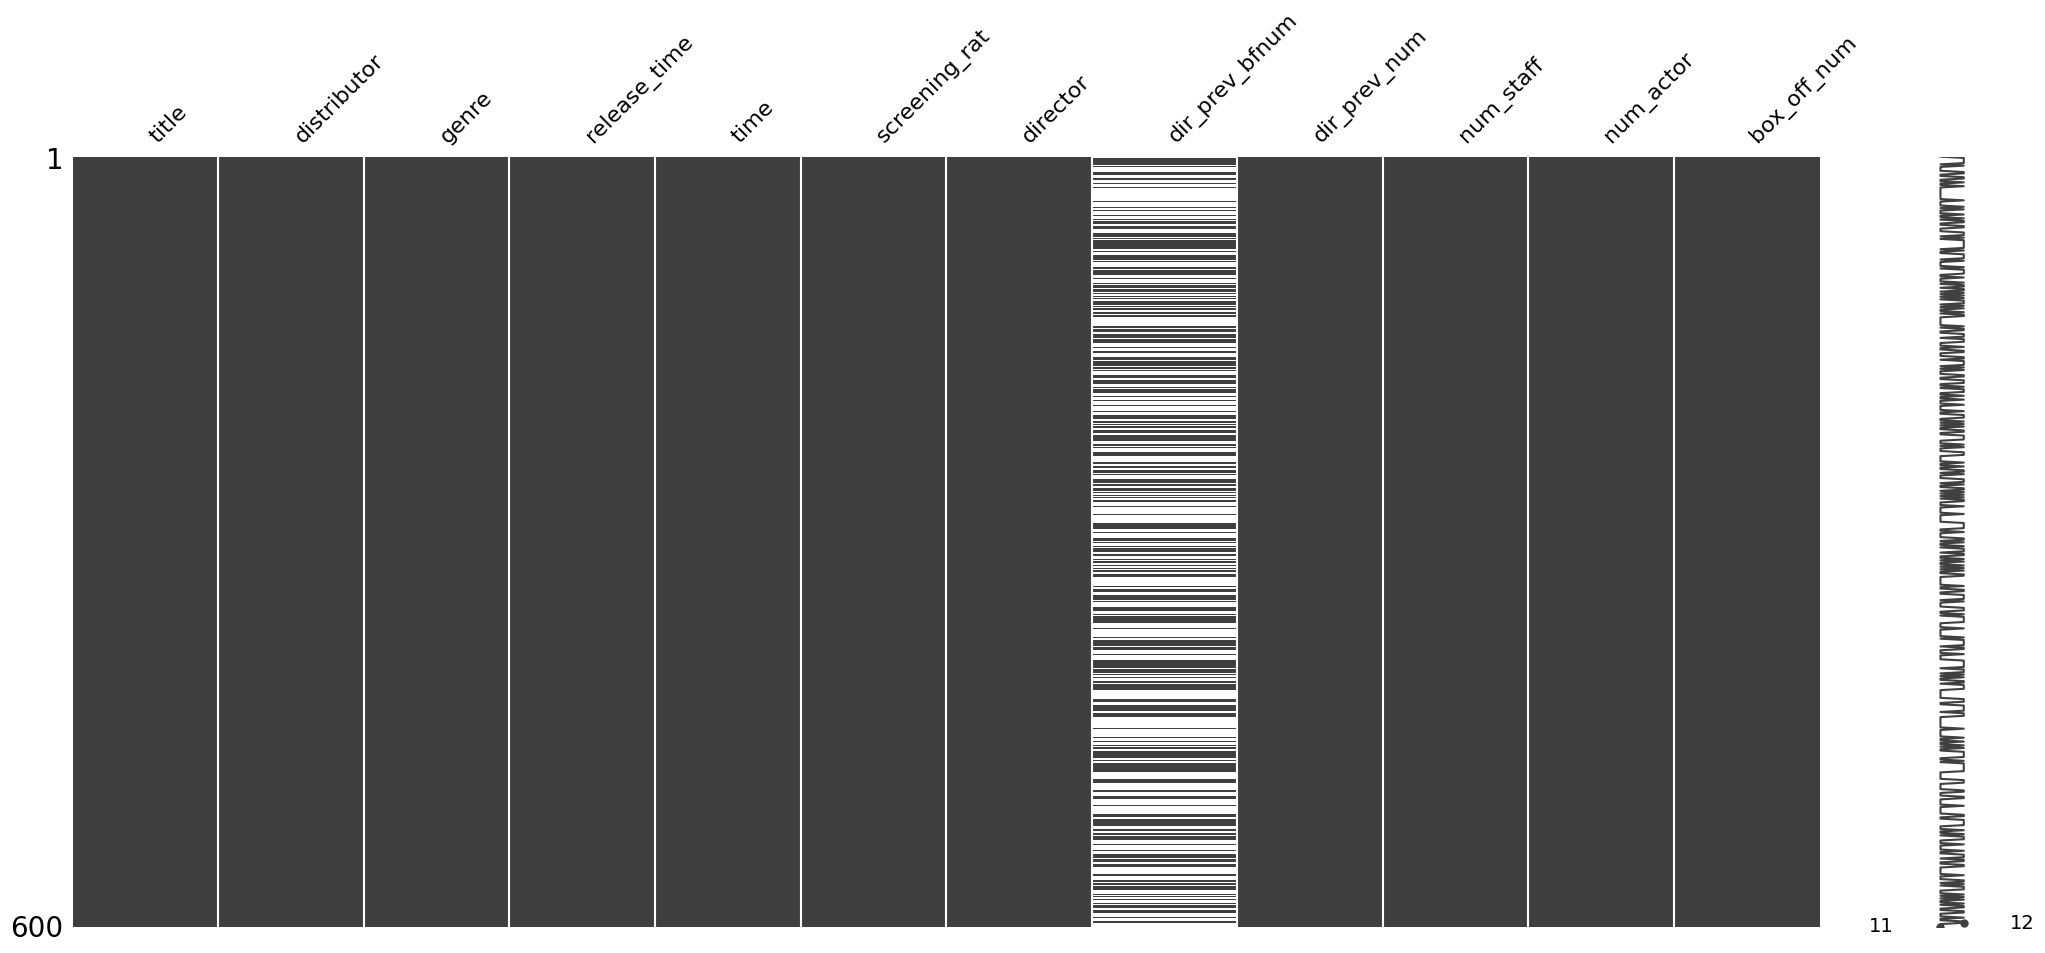

In [4]:
import missingno as msno
import matplotlib.pyplot as plt

# 매트릭스 그래프
msno.matrix(df)
plt.show()

In [5]:
df.isna().mean() #==> 55% 가 결측치

title             0.00
distributor       0.00
genre             0.00
release_time      0.00
time              0.00
screening_rat     0.00
director          0.00
dir_prev_bfnum    0.55
dir_prev_num      0.00
num_staff         0.00
num_actor         0.00
box_off_num       0.00
dtype: float64

In [8]:
#결측치가 있는 데이터의 감독은?
#결측치 주변 데이터를 확인 - 이용할지 말지 결정
#결측치가 생긴 원인 파악! - 이전 영화가 없는 신인감독이면.. 정상적인 데이터 NA==0
df[df.dir_prev_bfnum.isna()]
df.dir_prev_bfnum=df.dir_prev_bfnum.fillna(0)
df
df = df.fillna(0)
df.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [9]:
df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


<Axes: >

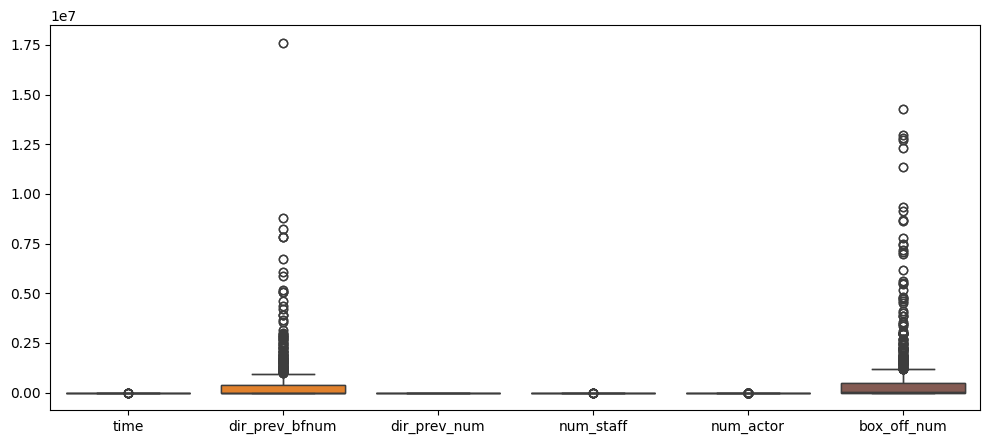

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.boxplot(data=df)

#하기 그래프 해석
#관객수의 편차가 많다는 소리 .. 히트작이 있음
sns.boxplot(data=df)


<Axes: xlabel='box_off_num'>

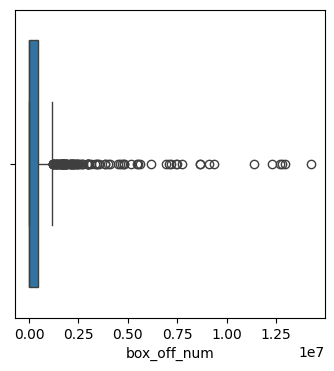

In [42]:
#관객수의 편차가 많다는 소리 .. 히트작이 있음
plt.figure(figsize=(4,4))
sns.boxplot(data=df, x='box_off_num')

<Axes: >

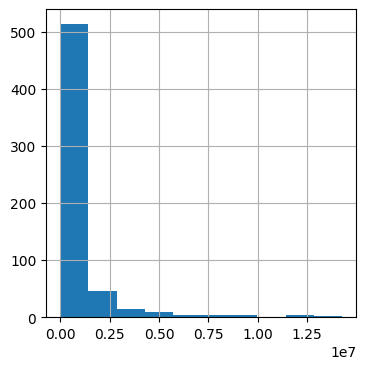

In [ ]:

plt.figure(figsize=(4,4))
df.box_off_num.hist()

# 데이터 분포특성
# 왼쪽으로 치우쳐져서 오른쪽 꼬리가 긴 형태(대부분의 관객수는 5만명대에 형성되어 있고)
#  outlier가 많고 크다 즉.. 히트작의 영향이 크다

<Axes: >

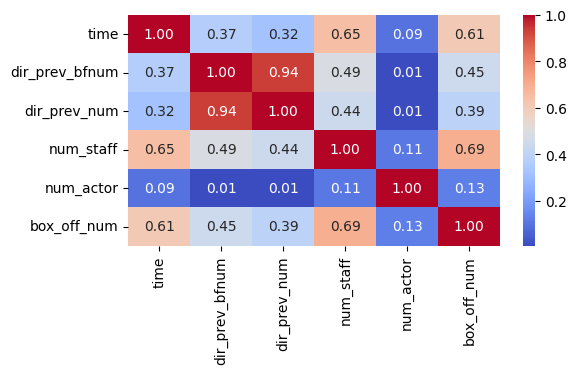

In [ ]:
# 관객수에 해당하는 box_off_num과 높은 상관관계를 가지는 변수를 찾아라.
plt.figure(figsize=(6,3))
temp=df.corr(method='spearman', numeric_only=True)
sns.heatmap(temp, annot=True, cmap='coolwarm', fmt='.2f')

# 관객수는 상영시간과 스텝수와 높은 상관관계를 보인다 - 상영시간이 길수록 관객수가 증가하는 경향

# 범주형 변수 분석

In [40]:
df.describe(include=['object','category'])

,title,distributor,genre,release_time,screening_rat,director
count,600,600,600,600,600,600
unique,600,169,12,330,4,472
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2010-09-16,청소년 관람불가,홍상수
freq,1,54,221,6,204,7
